# Project for Applied Statistics
___

The aim of this project is to analyze the PlantGrowth R dataset.

The dataset is described by Vincent Arel-Bundock as "Results from an experiment to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions."

In [33]:
# Import required libraries

# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-functions-scipy-stats
import scipy.stats as stats

# https://pandas.pydata.org/docs/reference/index.html
import pandas as pd

# https://seaborn.pydata.org/api.html
import seaborn as sns

In [34]:
# Load the data
data = pd.read_csv('data/PlantGrowth.csv')

# Brief description of the data
data.describe()

,rownames,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


In [35]:
data

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


As can be seen above and mentioned on https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html there are 30 entries in the dataset. 10 each for a control group, treatment 1, and treatment 2.

<Axes: xlabel='group', ylabel='weight'>

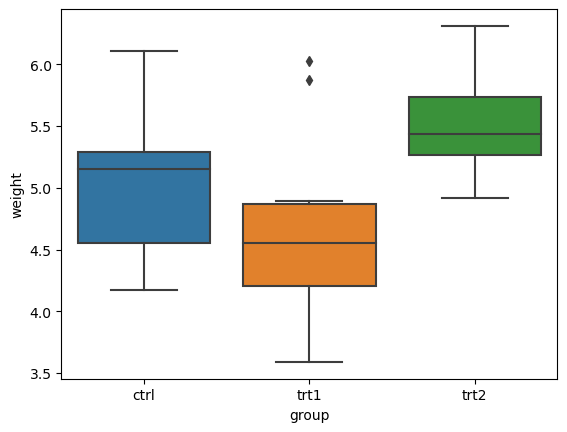

In [36]:
# Create a boxplot
# https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn-boxplot
sns.boxplot(x='group', y='weight', data=data)

The box plot above shows some interesting distinctions between the three categories within the dataset.

The categories trt1 and trt2 have the largest difference between them, with no overlap in their [interquartile range](https://www.statology.org/box-plot-percentages/) or [whiskers](https://seaborn.pydata.org/tutorial/categorical.html#boxplots).

The control group appears to have more significant overlap with both treatment groups. The interquartile range overlaps a lot with trt1 and the upper whisker overlaps significantly with trt2.

One other noticeable feature shown in the above box plot is that the treatment 1 group seems to have 2 outliers a large distance from its upper whisker.

<Axes: xlabel='group', ylabel='weight'>

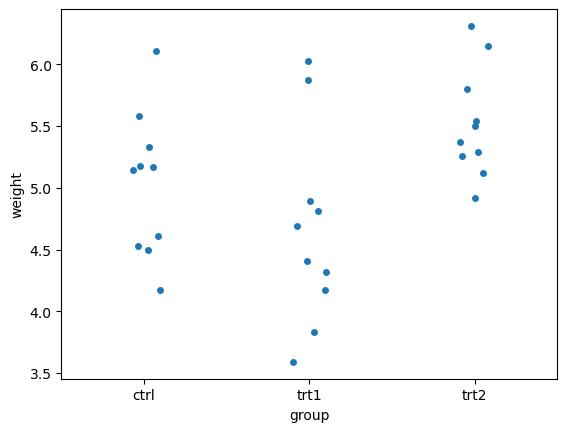

In [37]:
# Create a stripplot
# https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn-stripplot
sns.stripplot(x='group', y='weight', data=data, jitter=True, edgecolor='gray')  

The stripplot above helps to shed some additional light on features highlighted by the box plot. The degree to which ctrl overlaps with trt1 and trt2 is evident, as is the general separation of weights in trt1 and trt2, with the exception of the two outliers in trt1.

## t-tests
___
t-tests are a form of hypothesis testing. Hypothesis testing compares the null hypothesis with an alternative hypothesis.

- The null hypothesis will be that there is no effect, or no difference between the two groups considered.
- The alternative hypothesis is the hypothesis that is being tested for.

With the above data one might test to see if there is a difference in weight between any two of the groups recorded. Some information on hypothesis testing can be found [here](https://towardsdatascience.com/t-test-and-hypothesis-testing-explained-simply-1cff6358633e).

There are [three types](https://www.geeksforgeeks.org/t-test-in-statistics/) of t-test:
1. One Sample t-test - Test to be carried out when only one data set is available/required. Gets the mean of a group and checks the likelihood this average was gotten by chance or is representative.
2. Independent Samples t-test - Compares the means of two independent data sets and allows inference about the likelihood of those representing different population means.
3. Paired Samples t-test - Compares the means of two related data sets and allows inference about the likelihood of those representing different population means.

Each of the above types has a different formula that is used to calculate the t-statistic (the output of the t-test). While the formula will be different for each type of t-test, the underlying principle is to check the likelihood that the group mean (or difference in group means for types 2 and 3 above) is representative of the population.

[This](https://towardsdatascience.com/t-test-and-hypothesis-testing-explained-simply-1cff6358633e) resource likens the t-test to a signal-to-noise ratio. The below image from their website highlights this.

![](img/sig_noise.PNG)

The signal in this case being the difference in the group means, and the noise being the variance or spread of the samples. From this we can see that a larger difference in the means of the groups compared will result in a larger output (t-statistic). Conversely, a larger spread of values (resulting in a larger value for $s_{p}$) and/or a small number of samples (resulting in a larger value for the square root of $\sqrt{\frac{2}{n}}$) will reduce the size of the t-statistic.

### Assumptions
The t-test operates correctly only when certain assumptions about the data being analysed are met. The assumptions will vary depending on the type of t-test being utilized. Info on these assumptions for [one-sample](https://statistics.laerd.com/spss-tutorials/one-sample-t-test-using-spss-statistics.php), [independent](https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php), and [dependent](https://statistics.laerd.com/spss-tutorials/dependent-t-test-using-spss-statistics.php) t-tests can be found on the Laerd SPSS website. Below we will look at the assumptions for the dependent t-test as that is the most relevant to the current project. The assumptions are:

1. The dependent variable should be measured on a continuous scale. The variable should be measured using floating point or 'measuring' numbers rather than integers or categories.
2. The independent variable should have two categorical 'matched pairs'. This will often take the form of a 'before' and 'after' where there will be measurements for the same participant in a study before and after an intervention of some kind.
3. There should be no significant outliers bewteen the two groups being analysed. Outliers can diminish the validity of the reult from a dependent t-test.
4. The distribution of the differences in the dependent variable between the two groups should be approximately normally distributed. The Shapiro-Wilk test of normality can be used to test this.

In [38]:
# Create dataframe with treatment 1
trt1 = data[data.group == 'trt1']
trt1

,rownames,weight,group
10,11,4.81,trt1
11,12,4.17,trt1
12,13,4.41,trt1
13,14,3.59,trt1
14,15,5.87,trt1
15,16,3.83,trt1
16,17,6.03,trt1
17,18,4.89,trt1
18,19,4.32,trt1
19,20,4.69,trt1


In [39]:
# Create dataframe with treatment 2
trt2 = data[data.group == 'trt2']
trt2

,rownames,weight,group
20,21,6.31,trt2
21,22,5.12,trt2
22,23,5.54,trt2
23,24,5.50,trt2
24,25,5.37,trt2
25,26,5.29,trt2
26,27,4.92,trt2
27,28,6.15,trt2
28,29,5.80,trt2
29,30,5.26,trt2


In [40]:
# Perform a dependent t-test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
t_statistic, p_value = stats.ttest_rel(trt1['weight'], trt2['weight'])
print(t_statistic, p_value)


-2.8463513880802855 0.0192031388472628


From the above output we can see that the p-value is less than 0.05 and so we can reject the null hypothesis and infer that there is significant difference between groups trt1 and trt2.

## ANOVA
___

The ANOVA (analysis of variance) analyses  multiple groups to calculate whether there is a significant difference between their population means.

In [41]:
# Create dataframe with control group
ctrl = data[data.group == 'ctrl']
ctrl

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


In [42]:
# Order trt1 in ascending order
trt1 = trt1.sort_values(by='weight')
trt1

,rownames,weight,group
13,14,3.59,trt1
15,16,3.83,trt1
11,12,4.17,trt1
18,19,4.32,trt1
12,13,4.41,trt1
19,20,4.69,trt1
10,11,4.81,trt1
17,18,4.89,trt1
14,15,5.87,trt1
16,17,6.03,trt1


Some methods for detection and removal of outliers can be found [here](https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/). However, given the small size of the current dataset, and easy visual identification of outliers in the previous box plot, a simpler manual method was employed below.

In [43]:
# Remove outliers from trt1
trt1_no_ol = trt1[trt1['weight'] < 5.5]
trt1_no_ol

,rownames,weight,group
13,14,3.59,trt1
15,16,3.83,trt1
11,12,4.17,trt1
18,19,4.32,trt1
12,13,4.41,trt1
19,20,4.69,trt1
10,11,4.81,trt1
17,18,4.89,trt1


In [44]:
# Perform a one-way ANOVA without outliers
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
f_statistic, p_value = stats.f_oneway(ctrl['weight'], trt1_no_ol['weight'], trt2['weight'])
print(f_statistic, p_value)

12.394319269011735 0.00018202120046648817


In [45]:
# Perform a one-way ANOVA with outliers
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
f_statistic, p_value = stats.f_oneway(ctrl['weight'], trt1['weight'], trt2['weight'])
print(f_statistic, p_value)

4.846087862380136 0.0159099583256229


We can see above that regardless of whether the outliers are included or excluded, the p-value is sufficiently small to justify rejecting the null hypothesis. As recommended [here](https://real-statistics.com/one-way-analysis-of-variance-anova/outliers-anova/#:~:text=Dealing%20with%20outliers%201%20Run%20ANOVA%20on%20the,report%20your%20analysis%20with%20and%20without%20the%20outlier.) in this case it is best to use the full dataset for reporting of results.

In the current example no report is being published.

The p-value < 0.05 and rejection of the null hypothesis mean the ANOVA shows that there is significant difference between at least 2 of the groups. The ANOVA does not give us any information about which groups are significantly different.

To further investigate the results of an ANOVA, [Tukey's HSD](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html) (Honestly Significant Difference) test can be carried out.

In [46]:
# Perform Tukey's test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
res = stats.tukey_hsd(ctrl['weight'], trt1['weight'], trt2['weight'])
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.371     0.391    -0.320     1.062
 (0 - 2)     -0.494     0.198    -1.185     0.197
 (1 - 0)     -0.371     0.391    -1.062     0.320
 (1 - 2)     -0.865     0.012    -1.556    -0.174
 (2 - 0)      0.494     0.198    -0.197     1.185
 (2 - 1)      0.865     0.012     0.174     1.556



The above table gives comparisons between each of the three groups from the dataset (ctrl, trt1, trt2). Similar to the t-test, the above gives pairwise comparisons, that is comparisons between each pair of groups. 

The following p-values are given for the likelihood of each pair having the same population mean:
- Control Group and Treatment 1 - 0.391
- Control Group and Treatment 2 - 0.198
- Treatment 1 and Treatment 2 - 0.012

With only treatment 1 and treatment 2 having a p-value < 0.05, that is the only pair for which we would reject the null hypothesis that there is no difference between the population means.

When carrying out a t-test we also found agreeing evidence that there is a significant difference between treatments 1 and 2.

### ANOVA vs. t-test
There are similarities between ANOVA and t-tests in that they are both used to compare means. They both also operate with the null hypothesis that there is no differenc between the groupo means being examined. One of the most important [differences](https://www.geeksforgeeks.org/difference-between-t-test-and-anova/) between the ANOVA and the t-test is that the t-tes is limited to comparing two groups, while the ANOVA is used to compare three or more.

If there are only two groups to be compared then it makes sense to use the t-test to compare those groups and get a direct result. When there are more than two groups, however, there is a [problem](https://grants.hhp.uh.edu/doconnor/pep6305/multiple%20t%20tests.htm) with using the t-test multiple times. Assuming a threshold of 0.05, any given t-test has a 1 in 20 chance of incorrectly rejecting the null hypothesis. As you repeatedly carry out the t-test on each pair of groups to be compared, the chances of this Type I error compounds to create a wholly unreliable output. Given that there is initially a 1 in 20 chance of a Type I error, should 20 or more tests be required (as they would be for pairwise comparisons of 7 groups) then the chances become even or higher of getting at least one Type I error. This is actively done by some unscrupulous and/or ignorant researchers in a practice sometimes referred to as [p-hacking](https://pmc.ncbi.nlm.nih.gov/articles/PMC4359000/).

Using ANOVA instead of a t-test where there are more than two groups to be compared helps to reduce the chances of a Type I error as a single test is run to discern if there are any groups with significant difference in population mean. If ANOVA shows a significant difference between two or more groups, then a post hoc test such as Tukey's HSD can be carried out.

## End
___